In [3]:
from tensorflow import keras as ks
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
EDA_data = pd.read_csv('with_income.csv')
EDA_data

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,state,posting_date,income_this_year
0,auburn,15000.0,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000,automatic,rwd,full-size,truck,black,AL,2021,49769.0
1,auburn,19900.0,2004,ford,f250 super duty,good,8 cylinders,diesel,88000,automatic,4wd,full-size,pickup,blue,AL,2021,49769.0
2,auburn,14000.0,2012,honda,odyssey,excellent,6 cylinders,gas,95000,automatic,fwd,full-size,mini-van,silver,AL,2021,49769.0
3,auburn,22500.0,2001,ford,f450,good,8 cylinders,diesel,144700,manual,rwd,full-size,truck,white,AL,2021,49769.0
4,auburn,15000.0,2017,dodge,charger rt 4dr sedan,excellent,8 cylinders,gas,90000,automatic,rwd,mid-size,sedan,grey,AL,2021,49769.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86304,wyoming,18000.0,1990,jeep,gand wagoneer,good,8 cylinders,gas,114400,automatic,4wd,full-size,SUV,black,WY,2021,59626.0
86305,wyoming,9800.0,1985,nissan,300zx coupe with t-tops,like new,6 cylinders,gas,115000,automatic,rwd,sub-compact,hatchback,red,WY,2021,59626.0
86306,wyoming,6800.0,1997,jaguar,xk8 convertible,good,8 cylinders,gas,69550,automatic,rwd,compact,convertible,white,WY,2021,59626.0
86307,wyoming,0.0,2018,ram,2500,excellent,6 cylinders,diesel,20492,automatic,4wd,full-size,truck,white,WY,2021,59626.0


Exploratory Data Analysis 

In [5]:
corr = EDA_data[['region','price','year','manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', \
                'transmission', 'drive', 'size', 'type', 'paint_color', 'state', 'income_this_year']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/var/folders/v2/ct67bgdd55x221sfv_qy4jvw0000gn/T/ipykernel_57841/3857411707.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,price,year,odometer,income_this_year
price,1.00,-0.00,0.00,-0.00
year,-0.00,1.00,-0.08,-0.00
odometer,0.00,-0.08,1.00,-0.02
income_this_year,-0.00,-0.00,-0.02,1.00


count        86309
unique         404
top       columbus
freq          1116
Name: region, dtype: object


Text(0.5, 1.0, 'Top 30 Cities in Dataset')

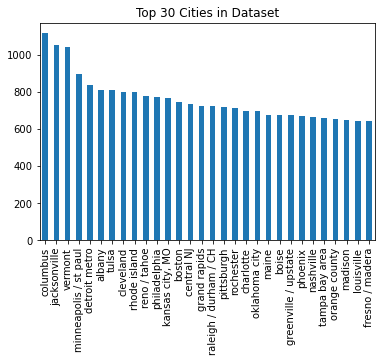

In [6]:
print(EDA_data.region.describe())
EDA_data['region'].value_counts().sort_values(ascending=0)[:30].plot(kind='bar')
plt.title("Top 30 Cities in Dataset")

count        86309
unique         404
top       columbus
freq          1116
Name: region, dtype: object


Text(0.5, 1.0, 'Prices')

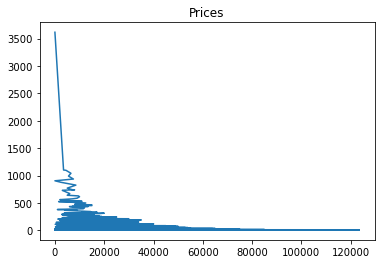

In [7]:
print(EDA_data.region.describe())
EDA_data['price'].value_counts().sort_values(ascending=0)[:30].plot(kind='line')
plt.title("Prices")

count    86309.000000
mean      2007.813403
std         11.123597
min       1900.000000
25%       2005.000000
50%       2010.000000
75%       2014.000000
max       2022.000000
Name: year, dtype: float64


Text(0.5, 1.0, 'Top 30 Years in Dataset')

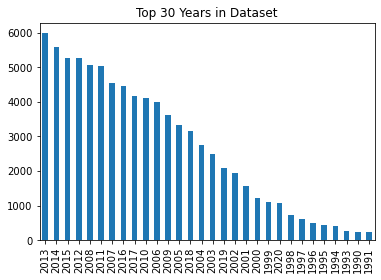

In [8]:
print(EDA_data.year.describe())
EDA_data['year'].value_counts().sort_values(ascending=0)[:30].plot(kind='bar')
plt.title("Top 30 Years in Dataset")

count     82120
unique       41
top        ford
freq      16112
Name: manufacturer, dtype: object


'\naston-martin\nland rover\ndatsun\nferrari\nalfa-romeo\ntesla\nharley-davidson\ndiat\njaguar\nporsche\nsaturn\nrover\nmercury\nmini\nmitsubishi\nvolvo\ninfiniti\n\n'

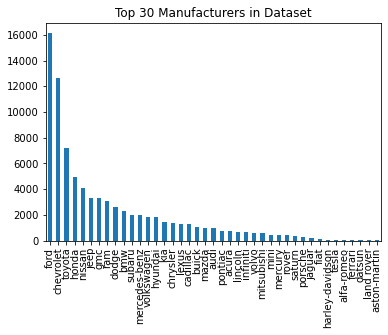

In [9]:
print(EDA_data.manufacturer.describe())
EDA_data['manufacturer'].value_counts().sort_values(ascending=0).plot(kind='bar')
plt.title("Top 30 Manufacturers in Dataset")

"""
aston-martin
land rover
datsun
ferrari
alfa-romeo
tesla
harley-davidson
diat
jaguar
porsche
saturn
rover
mercury
mini
mitsubishi
volvo
infiniti

"""

count         86309
unique            6
top       excellent
freq          42547
Name: condition, dtype: object


Text(0.5, 1.0, 'Conditions in Dataset')

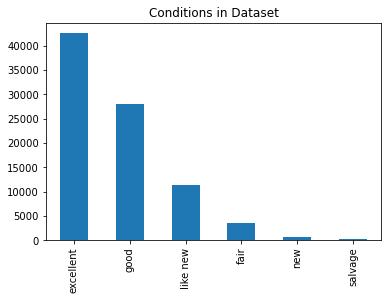

In [10]:
print(EDA_data.condition.describe())
EDA_data['condition'].value_counts().sort_values(ascending=0).plot(kind='bar')
plt.title("Conditions in Dataset")

count           86309
unique              8
top       6 cylinders
freq            29290
Name: cylinders, dtype: object


Text(0.5, 1.0, 'Cylinder Counts in Dataset')

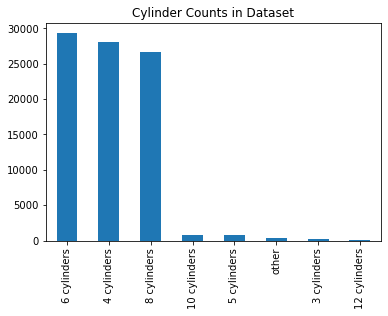

In [11]:
print(EDA_data.cylinders.describe())
EDA_data['cylinders'].value_counts().sort_values(ascending=0).plot(kind='bar')
plt.title("Cylinder Counts in Dataset")

count     86309
unique        5
top         gas
freq      78317
Name: fuel, dtype: object


Text(0.5, 1.0, 'Fuel Types in Dataset')

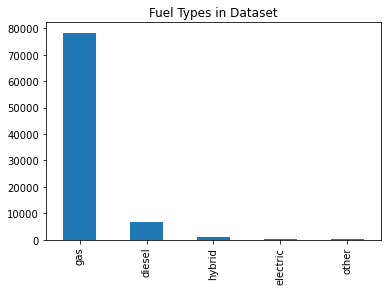

In [12]:
print(EDA_data.fuel.describe())
EDA_data['fuel'].value_counts().sort_values(ascending=0).plot(kind='bar')
plt.title("Fuel Types in Dataset")

count    8.630900e+04
mean     1.256997e+05
std      2.587053e+05
min      0.000000e+00
25%      7.224500e+04
50%      1.134520e+05
75%      1.559700e+05
max      1.000000e+07
Name: odometer, dtype: float64


Text(0.5, 1.0, 'Top 30 Odomoeter Readings in Dataset')

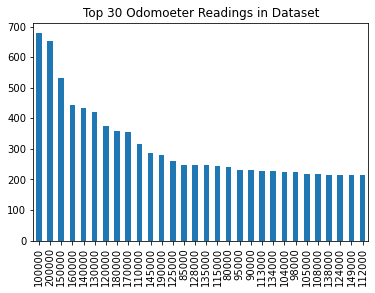

In [13]:
print(EDA_data.odometer.describe())
EDA_data['odometer'].value_counts().sort_values(ascending=0)[:30].plot(kind='bar')
plt.title("Top 30 Odomoeter Readings in Dataset")

count         86298
unique            3
top       automatic
freq          78271
Name: transmission, dtype: object


Text(0.5, 1.0, 'Transmission Types in Dataset')

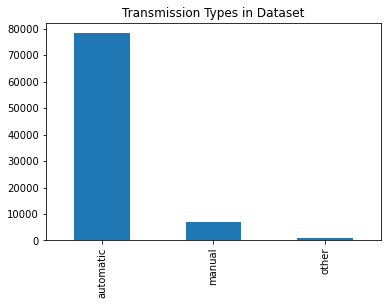

In [14]:
print(EDA_data.transmission.describe())
EDA_data['transmission'].value_counts().sort_values(ascending=0).plot(kind='bar')
plt.title("Transmission Types in Dataset")

count     86309
unique        3
top         4wd
freq      35394
Name: drive, dtype: object


Text(0.5, 1.0, 'Drive Types in Dataset')

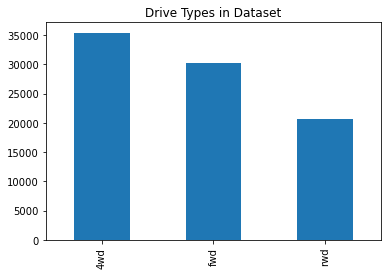

In [15]:
print(EDA_data.drive.describe())
EDA_data['drive'].value_counts().sort_values(ascending=0).plot(kind='bar')
plt.title("Drive Types in Dataset")

count         86309
unique            4
top       full-size
freq          48218
Name: size, dtype: object


Text(0.5, 1.0, 'Sizes in Dataset')

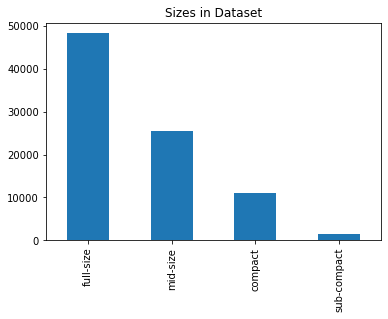

In [16]:
print(EDA_data['size'].describe())
EDA_data['size'].value_counts().sort_values(ascending=0).plot(kind='bar')
plt.title("Sizes in Dataset")

count     84240
unique       13
top       sedan
freq      22741
Name: type, dtype: object


Text(0.5, 1.0, 'Car Types in Dataset')

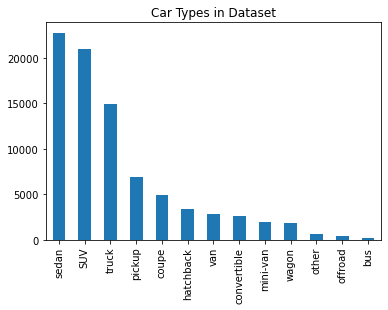

In [17]:
print(EDA_data.type.describe())
EDA_data['type'].value_counts().sort_values(ascending=0).plot(kind='bar')
plt.title("Car Types in Dataset")

count     86309
unique       12
top       white
freq      21591
Name: paint_color, dtype: object


Text(0.5, 1.0, 'Paint Colors in Dataset')

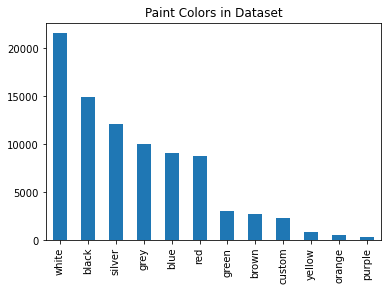

In [18]:
print(EDA_data.paint_color.describe())
EDA_data['paint_color'].value_counts().sort_values(ascending=0).plot(kind='bar')
plt.title("Paint Colors in Dataset")

count     86309
unique       51
top          CA
freq       9273
Name: state, dtype: object


Text(0.5, 1.0, 'Top 30 State Listings in Dataset')

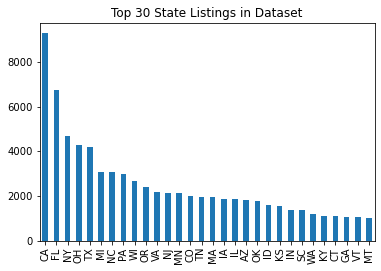

In [19]:
print(EDA_data.state.describe())
EDA_data['state'].value_counts().sort_values(ascending=0)[:30].plot(kind='bar')
plt.title("Top 30 State Listings in Dataset")

In [20]:
print(EDA_data.income_this_year.describe())

count    85786.000000
mean     65868.049134
std      13139.164673
min      45881.000000
25%      56494.000000
50%      62270.000000
75%      76614.000000
max      96477.000000
Name: income_this_year, dtype: float64




One-hotted Data and Models



In [21]:
one_hot_data = pd.read_csv('one_hotted_training_data.csv')
one_hot_data = one_hot_data[one_hot_data['price'] <= 50000]
one_hot_data = one_hot_data[one_hot_data['price'] > 500]
#print(one_hot_data.price.describe())
print(one_hot_data)

train, test = train_test_split(one_hot_data, test_size=0.2)
X_train = train.drop('price', axis=1).to_numpy()
y_train = train['price'].to_numpy()
X_valid = test.drop('price', axis=1).to_numpy()
y_valid = test['price'].to_numpy()


         price  year  condition  cylinders  odometer  posting_date  \
0      15000.0  2013         10          6    128000          2021   
1      19900.0  2004          6          8     88000          2021   
2      14000.0  2012         10          6     95000          2021   
3      22500.0  2001          6          8    144700          2021   
4      15000.0  2017         10          8     90000          2021   
...        ...   ...        ...        ...       ...           ...   
65798  18000.0  2005         10          8    130000          2021   
65799  18000.0  1990          6          8    114400          2021   
65800   9800.0  1985         15          6    115000          2021   
65801   6800.0  1997          6          8     69550          2021   
65802  21900.0  1920          6          6     11065          2021   

       income_this_year  manufactureracura  manufactureraudi  manufacturerbmw  \
0                 49769                  0                 0                0 

In [22]:

print("X_train Shape:", X_train.shape)
print("y_train Shape:", y_train.shape)
print("X_valid Shape:", X_valid.shape)
print("y_valid Shape:", y_valid.shape)

X_train Shape: (51132, 64)
y_train Shape: (51132,)
X_valid Shape: (12784, 64)
y_valid Shape: (12784,)


In [23]:
model_in = ks.Input(shape=(X_train.shape[1], ), dtype='float32')

out = ks.layers.LayerNormalization()(model_in)
out = ks.layers.Dense(1024, activation='relu')(out)
out = ks.layers.Dense(1024, activation='relu')(out)
out = ks.layers.Dropout(0.2)(out)
out = ks.layers.Dense(1024, activation='relu')(out)
out = ks.layers.Dropout(0.2)(out)
out = ks.layers.Dense(512, activation='relu')(out)
out = ks.layers.Dropout(0.2)(out)
out = ks.layers.Dense(512, activation='relu')(out)
out = ks.layers.Dropout(0.2)(out)
out = ks.layers.Dense(256, activation='relu')(out)
out = ks.layers.Dropout(0.2)(out)
out = ks.layers.Dense(128, activation='relu')(out)
out = ks.layers.Dense(64, activation='relu')(out)
out = ks.layers.Dense(32, activation='relu')(out)
out = ks.layers.Dense(16, activation='relu')(out)
out = ks.layers.Dense(1)(out)

model = ks.Model(model_in, out)
#model.summary()
model.compile(loss='mean_squared_error', optimizer=ks.optimizers.Adam(lr=3e-5))

Metal device set to: Apple M1 Pro


2022-12-15 16:32:05.680217: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-15 16:32:05.680409: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/opt/anaconda3/envs/keras_test_env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [24]:

model.fit(x=X_train, y=y_train, batch_size=100, epochs=15, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/15


2022-12-15 16:32:06.184114: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-15 16:32:06.527540: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


512/512 [==============================] - ETA: 0s - loss: 136612384.0000

2022-12-15 16:32:12.777806: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


512/512 [==============================] - 7s 13ms/step - loss: 136612384.0000 - val_loss: 80122656.0000
Epoch 2/15
512/512 [==============================] - 6s 12ms/step - loss: 81440248.0000 - val_loss: 79467792.0000
Epoch 3/15
512/512 [==============================] - 6s 12ms/step - loss: 81178688.0000 - val_loss: 79411328.0000
Epoch 4/15
512/512 [==============================] - 6s 12ms/step - loss: 80950888.0000 - val_loss: 79543992.0000
Epoch 5/15
512/512 [==============================] - 6s 12ms/step - loss: 80810992.0000 - val_loss: 79878520.0000
Epoch 6/15
512/512 [==============================] - 6s 12ms/step - loss: 80769488.0000 - val_loss: 79316240.0000
Epoch 7/15
512/512 [==============================] - 6s 12ms/step - loss: 80738320.0000 - val_loss: 79281872.0000
Epoch 8/15
512/512 [==============================] - 6s 13ms/step - loss: 80602936.0000 - val_loss: 79060992.0000
Epoch 9/15
512/512 [==============================] - 6s 12ms/step - loss: 80515424.0000 -

In [25]:
preds = model.predict(X_valid)
for i in range(5):
    print(preds[i], y_valid[i])
        
model.save("Overall.h5")

 50/400 [==>...........................] - ETA: 1s

2022-12-15 16:33:41.886891: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


400/400 [==============================] - 1s 3ms/step
[12214.4375] 8999.0
[10284.201] 13599.0
[10593.426] 7400.0
[8642.625] 8500.0
[8998.334] 3200.0


In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation



In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
preds = clf.predict(X_valid)

In [ ]:
for i in range(50):
    print(preds[i], y_valid[i])

In [ ]:
import joblib
joblib.dump(clf, "decision_tree.pkl") 
